#Data Science and Machine Learning Internship <br/> ProgramMini Project <br/>1-Stock Market Analysis Using PythonBusiness Scenario: <br/>Data Science extracts meaningful insight from chunks of raw data, which is useful to different business segments for planning their future course of action. Finance is probably one of the first to catch on to this trend with a rise in the penetration of analytics into many aspects of our lives. Here, we will analyze data from the stock market for some technology stocks such as Apple, Google, Amazon, and Microsoft.<br/>Objective:<br/> Use Python libraries such as Pandas, Seaborn, and Matplotlib to extract and analyze the information, visualize it, and look at different ways to analyze the risk of a stock, based on its performance history.About the Data: The stocks we have chosen are from various industries and market caps namely,<br/>•Apple<br/>•Google<br/>•Microsoft<br/>•Amazon<br/>For the start, we shall investigate the Amazon stock individually and then move on to the combined analysis.To know more about stocks and their data please visit the below link:https://in.finance.yahoo.com/The following tasks are to be performed:<br/>•Read the Data from Yahoo finance website directly.<br/>•Perform cleaning.<br/>•What was the change in stock price over time?<br/>•Visualize the change in a stock’s volume being traded, over time?<br/>•What was the moving average of various stocks?<br/>•What was the daily return average of a stock?<br/>•Adda new column ‘Trend’ whose values are based on the 'Daily Return'.<br/>•Visualize trend frequency through a Pie Chart.<br/>•What was the correlation between the daily returns of different stocks?


# 1. get the data for each of the company

In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 7.4 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas_datareader.data as web

In [4]:
stock_list=['AAPL','MSFT', 'GOOG', 'AMZN']

In [5]:
from datetime import datetime
end = datetime.now()

In [6]:
start_date = datetime(end.year-1,end.month,end.day)

# 2. Add a column for each dataframe as company and add the company name

In [7]:
amzn_test = web.DataReader(name='AMZN',data_source='yahoo',start=start_date,end=end)
amzn_test['company'] = 'Amazon'

In [8]:
aapl_test = web.DataReader(name='AAPL',data_source='yahoo',start=start_date,end=end)
aapl_test['company'] = 'Apple'

In [9]:
msft_test = web.DataReader(name='MSFT',data_source='yahoo',start=start_date,end=end)
msft_test['company'] = 'Microsoft'

In [10]:
goog_test = web.DataReader(name='GOOG',data_source='yahoo',start=start_date,end=end)
goog_test['company'] = 'Google'

# 3. Concatenate all the dataframes to convert into one dataframe. (pd.append or pd.concat)

In [11]:
a=pd.concat([amzn_test,aapl_test,msft_test,goog_test], sort=False)
a.head()

,High,Low,Open,Close,Volume,Adj Close,company
Date,,,,,,,
2021-06-07,3208.000000,3172.199951,3197.330078,3198.010010,2215800.0,3198.010010,Amazon
2021-06-08,3279.530029,3218.010010,3222.610107,3264.110107,3416700.0,3264.110107,Amazon
2021-06-09,3297.580078,3270.699951,3272.870117,3281.149902,2455500.0,3281.149902,Amazon
2021-06-10,3351.000000,3281.149902,3282.010010,3349.649902,3476500.0,3349.649902,Amazon
2021-06-11,3366.580078,3333.449951,3349.649902,3346.830078,2817400.0,3346.830078,Amazon


# 4. Save the dataframe as a csv file - df.to_csv()

In [12]:
a.to_csv()

'Date,High,Low,Open,Close,Volume,Adj Close,company\n2021-06-07,3208.0,3172.199951171875,3197.330078125,3198.010009765625,2215800.0,3198.010009765625,Amazon\n2021-06-08,3279.530029296875,3218.010009765625,3222.610107421875,3264.110107421875,3416700.0,3264.110107421875,Amazon\n2021-06-09,3297.580078125,3270.699951171875,3272.8701171875,3281.14990234375,2455500.0,3281.14990234375,Amazon\n2021-06-10,3351.0,3281.14990234375,3282.010009765625,3349.64990234375,3476500.0,3349.64990234375,Amazon\n2021-06-11,3366.580078125,3333.449951171875,3349.64990234375,3346.830078125,2817400.0,3346.830078125,Amazon\n2021-06-14,3385.0,3335.5,3346.830078125,3383.8701171875,2569700.0,3383.8701171875,Amazon\n2021-06-15,3396.989990234375,3363.110107421875,3384.0,3383.1298828125,2426200.0,3383.1298828125,Amazon\n2021-06-16,3426.35009765625,3360.530029296875,3392.0,3415.25,4202800.0,3415.25,Amazon\n2021-06-17,3497.199951171875,3401.0,3403.179931640625,3489.239990234375,5136500.0,3489.239990234375,Amazon\n2021-06-1

# 5. Check for null values, duplicate values - drop them if found

In [13]:
a = a.dropna(axis = "index", how = "any")
a=a.drop_duplicates()
a

,High,Low,Open,Close,Volume,Adj Close,company
Date,,,,,,,
2021-06-07,3208.000000,3172.199951,3197.330078,3198.010010,2215800.0,3198.010010,Amazon
2021-06-08,3279.530029,3218.010010,3222.610107,3264.110107,3416700.0,3264.110107,Amazon
2021-06-09,3297.580078,3270.699951,3272.870117,3281.149902,2455500.0,3281.149902,Amazon
2021-06-10,3351.000000,3281.149902,3282.010010,3349.649902,3476500.0,3349.649902,Amazon
2021-06-11,3366.580078,3333.449951,3349.649902,3346.830078,2817400.0,3346.830078,Amazon
...,...,...,...,...,...,...,...
2022-05-27,2257.360107,2191.000000,2195.770020,2255.979980,1496200.0,2255.979980,Google
2022-05-31,2328.669922,2251.449951,2261.580078,2280.780029,2565100.0,2280.780029,Google
2022-06-01,2347.979980,2271.010010,2298.629883,2282.739990,1431500.0,2282.739990,Google


# 6a. Get the starting value & end value for each company - display each row

In [14]:
a_1 = a[a['company'] =="Amazon"]
a_1.iloc[0]

High              3208.0
Low          3172.199951
Open         3197.330078
Close         3198.01001
Volume         2215800.0
Adj Close     3198.01001
company           Amazon
Name: 2021-06-07 00:00:00, dtype: object

In [15]:
a_1.iloc[-1]

High              2488.0
Low          2420.929932
Open              2484.0
Close             2447.0
Volume         4863500.0
Adj Close         2447.0
company           Amazon
Name: 2022-06-03 00:00:00, dtype: object

In [16]:
a_2 = a[a['company'] =="Apple"]
a_2.iloc[0]

High             126.32
Low          124.830002
Open         126.169998
Close        125.900002
Volume       71057600.0
Adj Close    125.184792
company           Apple
Name: 2021-06-07 00:00:00, dtype: object

In [17]:
a_2.iloc[-1]

High         147.970001
Low          144.460007
Open         146.899994
Close        145.380005
Volume       88471400.0
Adj Close    145.380005
company           Apple
Name: 2022-06-03 00:00:00, dtype: object

In [18]:
a_3 = a[a['company'] =="Microsoft"]
a_3.iloc[0]

High         254.089996
Low          249.809998
Open         249.979996
Close        253.809998
Volume       23079200.0
Adj Close    251.754303
company       Microsoft
Name: 2021-06-07 00:00:00, dtype: object

In [19]:
a_3.iloc[-1]

High         273.450012
Low          268.410004
Open         270.309998
Close        270.019989
Volume       28048000.0
Adj Close    270.019989
company       Microsoft
Name: 2022-06-03 00:00:00, dtype: object

In [20]:
a_4 = a[a['company'] =="Google"]
a_4.iloc[0]

High              2468.0
Low          2441.072998
Open         2451.320068
Close        2466.090088
Volume         1192500.0
Adj Close    2466.090088
company           Google
Name: 2021-06-07 00:00:00, dtype: object

In [21]:
a_4.iloc[-1]

High         2327.290039
Low          2273.360107
Open         2319.850098
Close        2291.280029
Volume         1252600.0
Adj Close    2291.280029
company           Google
Name: 2022-06-03 00:00:00, dtype: object

# 6b. Create a line plot for each company - all the plots are in same figure region - us the column - 'Adj Close'

Text(0.5, 0, 'Date')

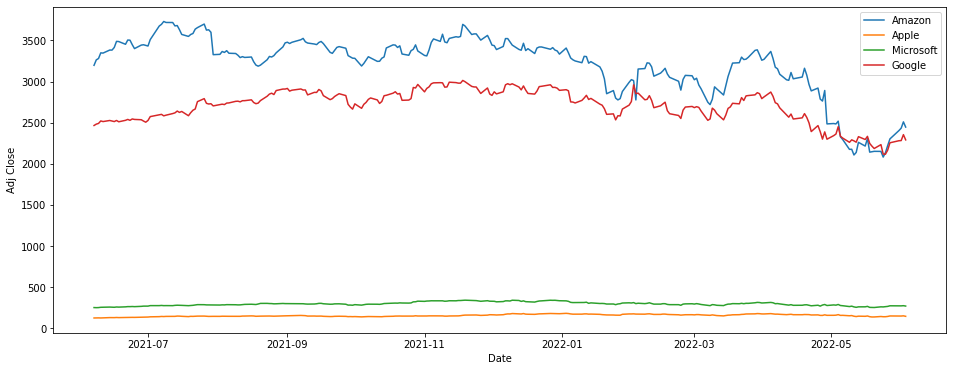

In [22]:
plt.figure(figsize=(16,6))
sns.lineplot(data=amzn_test["Adj Close"],label="Amazon")
sns.lineplot(data=aapl_test["Adj Close"],label="Apple")
sns.lineplot(data=msft_test["Adj Close"],label="Microsoft")
sns.lineplot(data=goog_test["Adj Close"],label="Google")
plt.xlabel("Date")

# 7. Create individual line plot for each company in differnt figures

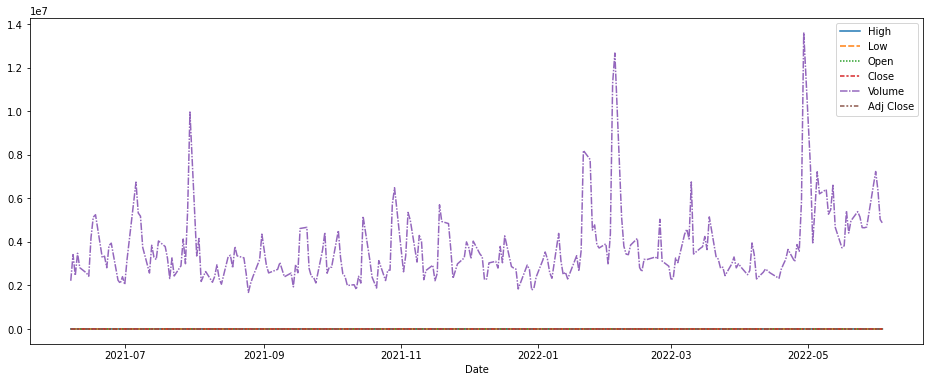

In [23]:
plt.figure(figsize=(16,6))
sns.lineplot(data=amzn_test)

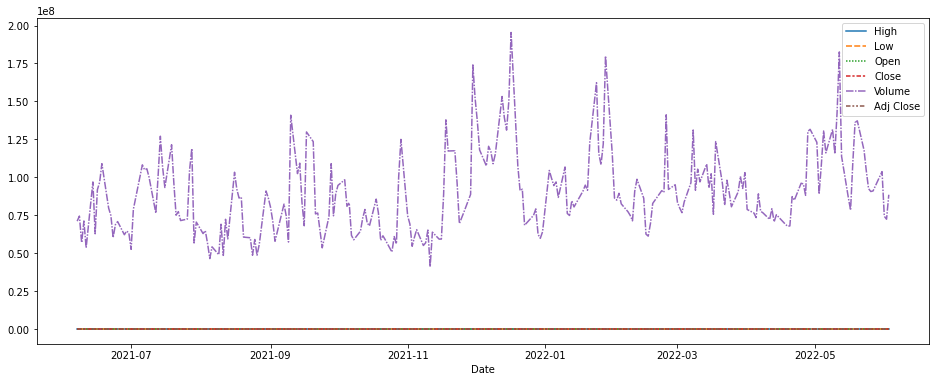

In [24]:
plt.figure(figsize=(16,6))
sns.lineplot(data=aapl_test)

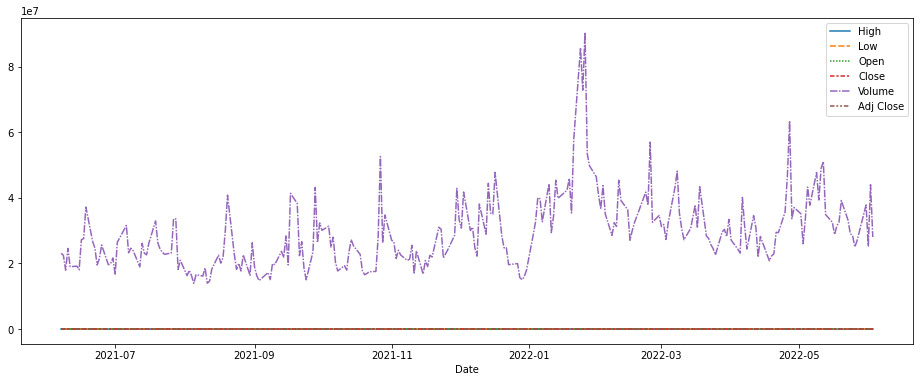

In [25]:
plt.figure(figsize=(16,6))
sns.lineplot(data=msft_test)

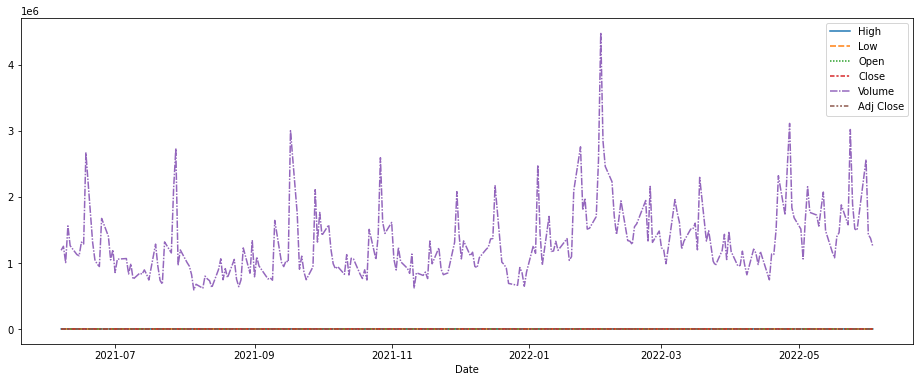

In [26]:
plt.figure(figsize=(16,6))
sns.lineplot(data=goog_test)

# 8. Find moving average for 20 days, and create a separate column to store these values

In [27]:
a['MA for 20 Days'] = a['Adj Close'].rolling(20).mean()
a.head(30)

,High,Low,Open,Close,Volume,Adj Close,company,MA for 20 Days
Date,,,,,,,,
2021-06-07,3208.000000,3172.199951,3197.330078,3198.010010,2215800.0,3198.010010,Amazon,NaN
2021-06-08,3279.530029,3218.010010,3222.610107,3264.110107,3416700.0,3264.110107,Amazon,NaN
2021-06-09,3297.580078,3270.699951,3272.870117,3281.149902,2455500.0,3281.149902,Amazon,NaN
2021-06-10,3351.000000,3281.149902,3282.010010,3349.649902,3476500.0,3349.649902,Amazon,NaN
2021-06-11,3366.580078,3333.449951,3349.649902,3346.830078,2817400.0,3346.830078,Amazon,NaN
2021-06-14,3385.000000,3335.500000,3346.830078,3383.870117,2569700.0,3383.870117,Amazon,NaN
2021-06-15,3396.989990,3363.110107,3384.000000,3383.129883,2426200.0,3383.129883,Amazon,NaN
2021-06-16,3426.350098,3360.530029,3392.000000,3415.250000,4202800.0,3415.250000,Amazon,NaN
2021-06-17,3497.199951,3401.000000,3403.179932,3489.239990,5136500.0,3489.239990,Amazon,NaN


# 9. Find moving average for 50 days, and create a separate column to store these values

In [28]:
a['MA for 50 Days'] = a['Adj Close'].rolling(50).mean()
a.head(70)

,High,Low,Open,Close,Volume,Adj Close,company,MA for 20 Days,MA for 50 Days
Date,,,,,,,,,
2021-06-07,3208.000000,3172.199951,3197.330078,3198.010010,2215800.0,3198.010010,Amazon,NaN,NaN
2021-06-08,3279.530029,3218.010010,3222.610107,3264.110107,3416700.0,3264.110107,Amazon,NaN,NaN
2021-06-09,3297.580078,3270.699951,3272.870117,3281.149902,2455500.0,3281.149902,Amazon,NaN,NaN
2021-06-10,3351.000000,3281.149902,3282.010010,3349.649902,3476500.0,3349.649902,Amazon,NaN,NaN
2021-06-11,3366.580078,3333.449951,3349.649902,3346.830078,2817400.0,3346.830078,Amazon,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-09-08,3545.629883,3495.669922,3511.649902,3525.500000,3053400.0,3525.500000,Amazon,3345.161511,3463.271597
2021-09-09,3549.989990,3480.370117,3526.020020,3484.159912,2719200.0,3484.159912,Amazon,3354.764001,3463.991997
2021-09-10,3508.449951,3462.909912,3501.830078,3469.149902,2397300.0,3469.149902,Amazon,3363.046497,3464.571797


# 10. Find moving average for 100 days, and create a separate column to store these values

In [29]:
a['MA for 100 Days'] = a['Adj Close'].rolling(100).mean()
a.head(150)

,High,Low,Open,Close,Volume,Adj Close,company,MA for 20 Days,MA for 50 Days,MA for 100 Days
Date,,,,,,,,,,
2021-06-07,3208.000000,3172.199951,3197.330078,3198.010010,2215800.0,3198.010010,Amazon,NaN,NaN,NaN
2021-06-08,3279.530029,3218.010010,3222.610107,3264.110107,3416700.0,3264.110107,Amazon,NaN,NaN,NaN
2021-06-09,3297.580078,3270.699951,3272.870117,3281.149902,2455500.0,3281.149902,Amazon,NaN,NaN,NaN
2021-06-10,3351.000000,3281.149902,3282.010010,3349.649902,3476500.0,3349.649902,Amazon,NaN,NaN,NaN
2021-06-11,3366.580078,3333.449951,3349.649902,3346.830078,2817400.0,3346.830078,Amazon,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-31,3387.000000,3331.169922,3379.120117,3334.340088,2391500.0,3334.340088,Amazon,3414.920520,3454.559419,3404.869214
2022-01-03,3414.070068,3323.209961,3351.000000,3408.090088,3176000.0,3408.090088,Amazon,3415.835522,3454.021021,3406.029014
2022-01-04,3428.000000,3326.989990,3408.760010,3350.439941,3536300.0,3350.439941,Amazon,3411.989014,3454.318818,3406.498413


11. Daily return   - create a new column in dataframe

In [30]:
a['Daily Return'] = a['Adj Close'].pct_change()
a

,High,Low,Open,Close,Volume,Adj Close,company,MA for 20 Days,MA for 50 Days,MA for 100 Days,Daily Return
Date,,,,,,,,,,,
2021-06-07,3208.000000,3172.199951,3197.330078,3198.010010,2215800.0,3198.010010,Amazon,NaN,NaN,NaN,NaN
2021-06-08,3279.530029,3218.010010,3222.610107,3264.110107,3416700.0,3264.110107,Amazon,NaN,NaN,NaN,0.020669
2021-06-09,3297.580078,3270.699951,3272.870117,3281.149902,2455500.0,3281.149902,Amazon,NaN,NaN,NaN,0.005220
2021-06-10,3351.000000,3281.149902,3282.010010,3349.649902,3476500.0,3349.649902,Amazon,NaN,NaN,NaN,0.020877
2021-06-11,3366.580078,3333.449951,3349.649902,3346.830078,2817400.0,3346.830078,Amazon,NaN,NaN,NaN,-0.000842
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,2257.360107,2191.000000,2195.770020,2255.979980,1496200.0,2255.979980,Google,2270.054492,2497.861401,2596.360808,0.041581
2022-05-31,2328.669922,2251.449951,2261.580078,2280.780029,2565100.0,2280.780029,Google,2266.936499,2488.756401,2591.637908,0.010993
2022-06-01,2347.979980,2271.010010,2298.629883,2282.739990,1431500.0,2282.739990,Google,2262.943994,2479.819800,2586.955107,0.000859


# 12. Categorize on the basis of daily return

In [31]:
def trend(x):
  if x > -0.015 and x <= 0.015:
    return 'Slight or No change'
  elif x > 0.015 and x <= 0.04:
    return 'Slight Positive'
  elif x < -0.015 and x >= -0.4:
    return 'Slight Negative'
  elif x > 0.04 and x <= 0.06:
    return 'Positive'
  elif x < -0.04 and x >= -0.06:
    return 'Negative'
  elif x > 0.06 and x <= 0.07:
    return 'Among top gainers'
  elif x < -0.06 and x >= -0.07:
    return 'Among top losers'
  elif x > 0.07:
    return 'Bull run'
  elif x <= -0.07:
    return 'Bear drop'

In [32]:
a['Trend'] = a['Daily Return'].apply(lambda x: trend(x))
a

,High,Low,Open,Close,Volume,Adj Close,company,MA for 20 Days,MA for 50 Days,MA for 100 Days,Daily Return,Trend
Date,,,,,,,,,,,,
2021-06-07,3208.000000,3172.199951,3197.330078,3198.010010,2215800.0,3198.010010,Amazon,NaN,NaN,NaN,NaN,None
2021-06-08,3279.530029,3218.010010,3222.610107,3264.110107,3416700.0,3264.110107,Amazon,NaN,NaN,NaN,0.020669,Slight Positive
2021-06-09,3297.580078,3270.699951,3272.870117,3281.149902,2455500.0,3281.149902,Amazon,NaN,NaN,NaN,0.005220,Slight or No change
2021-06-10,3351.000000,3281.149902,3282.010010,3349.649902,3476500.0,3349.649902,Amazon,NaN,NaN,NaN,0.020877,Slight Positive
2021-06-11,3366.580078,3333.449951,3349.649902,3346.830078,2817400.0,3346.830078,Amazon,NaN,NaN,NaN,-0.000842,Slight or No change
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,2257.360107,2191.000000,2195.770020,2255.979980,1496200.0,2255.979980,Google,2270.054492,2497.861401,2596.360808,0.041581,Positive
2022-05-31,2328.669922,2251.449951,2261.580078,2280.780029,2565100.0,2280.780029,Google,2266.936499,2488.756401,2591.637908,0.010993,Slight or No change
2022-06-01,2347.979980,2271.010010,2298.629883,2282.739990,1431500.0,2282.739990,Google,2262.943994,2479.819800,2586.955107,0.000859,Slight or No change


# 13. Create Pie chart for trend column

In [33]:
n = list(a["Trend"])

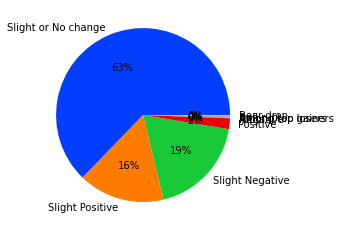

In [34]:
Slight_or_No_change=n.count('Slight or No change')
Slight_Positive=n.count("Slight Positive")
Slight_Negative=n.count("Slight Negative")
Positive=n.count("Positive")
Negative=n.count("Negative")
Among_top_gainers=n.count("Among top gainers")
Among_top_losers=n.count("Among top losers")
Bull_run=n.count("Bull run")
Bear_drop=n.count("Bear drop")
list1=[Slight_or_No_change,Slight_Positive,Slight_Negative,Positive,Negative,Among_top_gainers,Among_top_losers,Bull_run,Bear_drop]
list2=['Slight or No change',"Slight Positive","Slight Negative","Positive","Negative","Among top gainers","Among top losers","Bull run","Bear drop"]
palette_color = sns.color_palette('bright')
plt.pie(list1, labels=list2, colors=palette_color, autopct='%.0f%%')
plt.show()

# 14. Consider columns of 'Adj Close' for each company, and create it as a dataframe, and find correlation

In [35]:
Data_Adj_Close=pd.concat([amzn_test["Adj Close"],aapl_test["Adj Close"],msft_test["Adj Close"],goog_test["Adj Close"]], sort=False)
Data_Adj_Close

Date
2021-06-07    3198.010010
2021-06-08    3264.110107
2021-06-09    3281.149902
2021-06-10    3349.649902
2021-06-11    3346.830078
                 ...     
2022-05-27    2255.979980
2022-05-31    2280.780029
2022-06-01    2282.739990
2022-06-02    2354.919922
2022-06-03    2291.280029
Name: Adj Close, Length: 1008, dtype: float64

In [36]:
amzn_adj_close=amzn_test["Adj Close"]
aapl_adj_close=aapl_test["Adj Close"]
msft_adj_close=msft_test["Adj Close"]
goog_adj_close=goog_test["Adj Close"]
Data_Adj_Close=pd.DataFrame(data=[amzn_adj_close,aapl_adj_close,msft_adj_close,goog_adj_close],index=["amzn_adj_close","aapl_adj_close","msft_adj_close","goog_adj_close"])
Data_Adj_Close

Date,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-14,2021-06-15,2021-06-16,2021-06-17,2021-06-18,...,2022-05-20,2022-05-23,2022-05-24,2022-05-25,2022-05-26,2022-05-27,2022-05-31,2022-06-01,2022-06-02,2022-06-03
amzn_adj_close,3198.010010,3264.110107,3281.149902,3349.649902,3346.830078,3383.870117,3383.129883,3415.250000,3489.239990,3486.899902,...,2151.820068,2151.139893,2082.000000,2135.500000,2221.550049,2302.929932,2404.189941,2433.679932,2510.219971,2447.000000
aapl_adj_close,125.184792,126.020020,126.407799,125.393600,126.626549,129.738770,128.903534,129.410645,131.041321,129.718903,...,137.589996,143.110001,140.360001,140.520004,143.779999,149.639999,148.839996,148.710007,151.210007,145.380005
msft_adj_close,251.754303,250.524338,251.536057,255.156509,255.801270,257.785034,256.267456,255.295364,258.786835,257.328766,...,252.559998,260.649994,259.619995,262.519989,265.899994,273.239990,271.869995,272.420013,274.579987,270.019989
goog_adj_close,2466.090088,2482.850098,2491.399902,2521.600098,2513.929932,2527.040039,2520.659912,2513.929932,2527.419922,2511.350098,...,2186.260010,2233.330078,2118.520020,2116.790039,2165.919922,2255.979980,2280.780029,2282.739990,2354.919922,2291.280029


# 15. Create heatmap for that correlation values

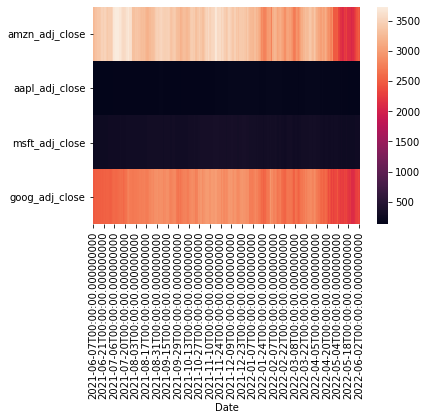

In [37]:
sns.heatmap(data=Data_Adj_Close)